In [1]:
# Get to the data folder
%cd '/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle/'
%pwd

/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle


'/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle'

## IMPORTS 

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical 

from time import time
from joblib import dump, load

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report

import itertools
import tensorflow as tf


## Loading Models

In [18]:
n_neurones_liste = [2, 10, 20, 50, 100, 500, 1000, 2000] 
All_model=[]
All_hist=[]
All_params=[]
for n_neurones in n_neurones_liste:
    LoadFileName = 'ANN_L1_relu' + str(n_neurones) + 'u_.joblib'
    model, params, train_history = load(LoadFileName)
    All_model.append(model)
    All_hist.append(train_history)   
    All_params.append(params)
    

In [13]:
All_hist

## Create a new plots combining many models 

In [19]:
all_Acc_val = []
all_Acc = [] 
for i in range(len(All_hist)):
    Accuracy_validation = np.round((All_hist[i].history['val_accuracy'][-1]),3)
    Accuracy_train = np.round((All_hist[i].history['accuracy'][-1]),3)
    print('Accuracy_train=', Accuracy_train)
    print('Accuracy_validation=', Accuracy_validation)
    all_Acc_val.append(Accuracy_validation)
    all_Acc.append(Accuracy_train) 

Accuracy_train= 0.842
Accuracy_validation= 0.842
Accuracy_train= 0.867
Accuracy_validation= 0.864
Accuracy_train= 0.884
Accuracy_validation= 0.88
Accuracy_train= 0.907
Accuracy_validation= 0.9
Accuracy_train= 0.917
Accuracy_validation= 0.911
Accuracy_train= 0.956
Accuracy_validation= 0.943
Accuracy_train= 0.967
Accuracy_validation= 0.953
Accuracy_train= 0.977
Accuracy_validation= 0.959


Text(0.5, 1.0, 'Performances en fonction du nombre de neurones \n Model a une unique couche intermediaire')

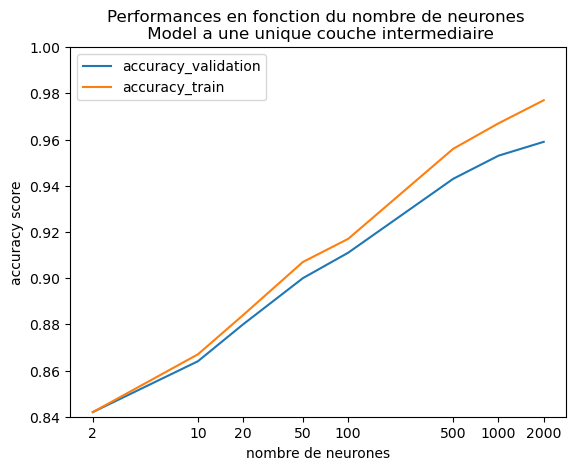

In [20]:
plt.plot(np.log(n_neurones_liste), all_Acc_val, label = 'accuracy_validation')
plt.plot(np.log(n_neurones_liste), all_Acc, label = 'accuracy_train')
plt.xticks(np.log(n_neurones_liste), n_neurones_liste)
plt.legend()
plt.ylim([0.84, 1])
plt.ylabel('accuracy score')
plt.xlabel('nombre de neurones')
plt.title("Performances en fonction du nombre de neurones \n Model a une unique couche intermediaire")

Text(0.5, 1.0, "temps d'apprentissage pour une seule couche intermediaire")

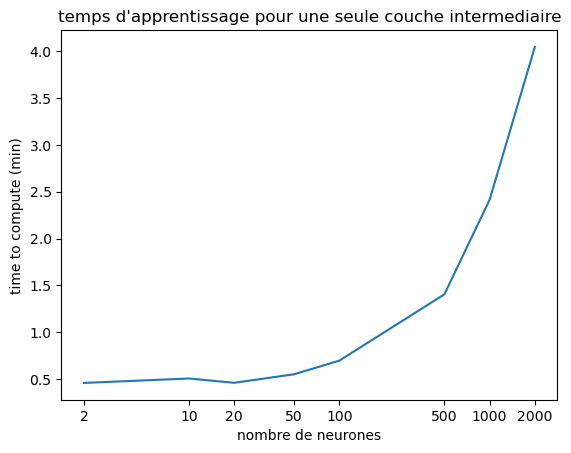

In [21]:
timetr=[]
for i in range(len(All_hist)):
    timetr.append(All_params[i]['train_time']/60)
plt.plot(np.log(n_neurones_liste), timetr)
plt.xticks(np.log(n_neurones_liste), n_neurones_liste)
plt.ylabel('time to compute (min)')
plt.xlabel('nombre de neurones')
plt.title("temps d'apprentissage pour une seule couche intermediaire")

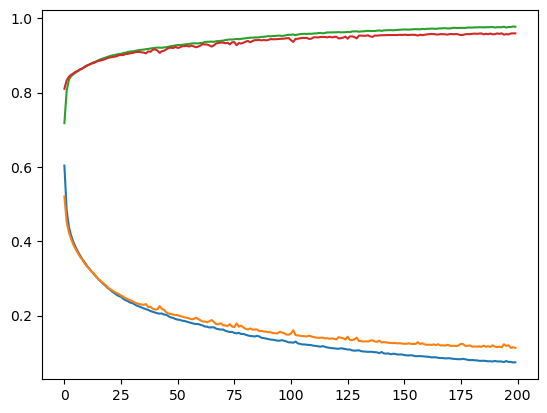

In [22]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
# plt.xlim([150,200])